<a href="https://colab.research.google.com/github/AssiaThabet/first_git/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hi, it's my first competition in kaggle!!

### I'm going to predict a titanik Survived with nn!!!

In [12]:
import pandas as pd

data = pd.read_csv('train.csv')

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I'm going to take as x the fare, Pclass, Sex and age

In [13]:
data.drop(['PassengerId', 'Name', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [14]:
data

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000
887,1,1,female,19.0,0,30.0000
888,0,3,female,NaN,1,23.4500
889,1,1,male,26.0,0,30.0000


In [19]:
import numpy as np

data['Age'] = data['Age'].fillna(data['Age'].mean()).astype(np.int64)


## Analitic

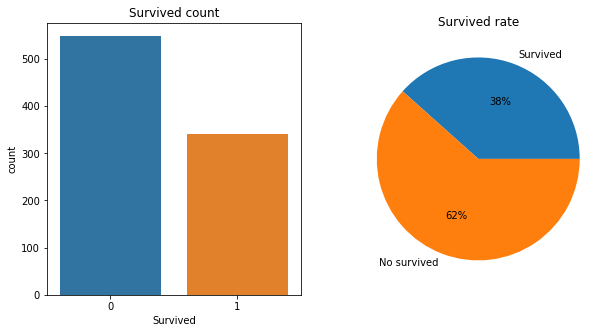

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

total_survived = data['Survived'].sum()
total_no_survived = 891 - total_survived
 
plt.figure(figsize = (10,5)) # создать холст
plt.subplot(121) # Добавить первый подзаголовок
sns.countplot(x='Survived',data=data)
plt.title('Survived count')
 
plt.subplot (122) # Добавить второй подзаголовок
plt.pie([total_survived,total_no_survived],labels=['Survived','No survived'],autopct='%1.0f%%')
plt.title('Survived rate')
 
plt.show()

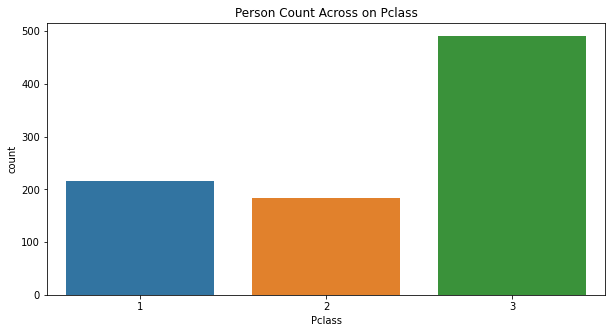

In [26]:
plt.figure (figsize = (10,5)) # создать холст
sns.countplot(x='Pclass',data=data)
plt.title('Person Count Across on Pclass')
 
plt.show()

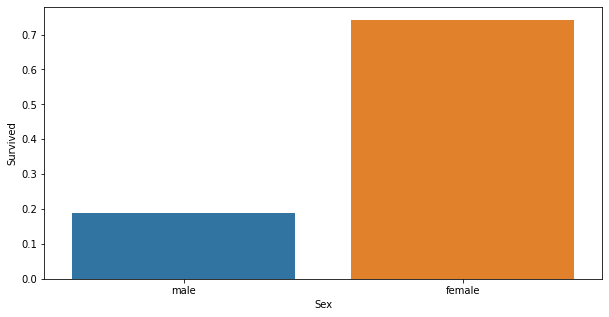

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Sex',y='Survived',ci=None) 
 
plt.show()

In [30]:

data.pivot_table(values='Survived',index=['Pclass','Sex'],aggfunc=np.mean)

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [35]:
data.loc[data['Sex'] == 'male','Sex'] = 0
data.loc[data['Sex'] == 'female','Sex'] = 1

## train and test datas

In [37]:
data

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,0,22,1,7.2500
1,1,1,1,38,1,71.2833
2,1,3,1,26,0,7.9250
3,1,1,1,35,1,53.1000
4,0,3,0,35,0,8.0500
...,...,...,...,...,...,...
886,0,2,0,27,0,13.0000
887,1,1,1,19,0,30.0000
888,0,3,1,29,1,23.4500
889,1,1,0,26,0,30.0000


In [69]:
x = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']]

In [70]:
y = data[['Survived']]

In [71]:
x = np.asarray(x).astype('float32')
y = np.asarray(y).astype('float32')

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y,
                                                    test_size=0.25)

In [74]:
x_train

array([[  3.    ,   0.    ,  29.    ,   0.    ,   7.3125],
       [  3.    ,   0.    ,   4.    ,   4.    ,  31.275 ],
       [  3.    ,   1.    ,  31.    ,   0.    ,   7.8542],
       ...,
       [  1.    ,   0.    ,  35.    ,   0.    , 512.3292],
       [  3.    ,   1.    ,  48.    ,   1.    ,  34.375 ],
       [  1.    ,   1.    ,  41.    ,   0.    , 134.5   ]], dtype=float32)

In [52]:
from tensorflow import keras                        # импорт керас
from tensorflow.keras.layers import Dense, Flatten
from keras.models import Sequential  

In [128]:

model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))

model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                192       
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None


In [129]:
model.compile(optimizer='rmsprop',  loss='binary_crossentropy', metrics=['accuracy'])

In [130]:
fit = model.fit(x_train, y_train, batch_size=1, epochs=50, validation_split=0.2)

Epoch 1/50
534/534 [==============================] - 2s 2ms/step - loss: 1.0042 - accuracy: 0.6049 - val_loss: 0.9472 - val_accuracy: 0.5746
Epoch 2/50
534/534 [==============================] - 1s 2ms/step - loss: 0.6318 - accuracy: 0.6648 - val_loss: 0.5301 - val_accuracy: 0.7388
Epoch 3/50
534/534 [==============================] - 1s 2ms/step - loss: 0.5750 - accuracy: 0.7191 - val_loss: 0.7120 - val_accuracy: 0.6866
Epoch 4/50
534/534 [==============================] - 1s 2ms/step - loss: 0.5697 - accuracy: 0.7509 - val_loss: 0.5432 - val_accuracy: 0.7612
Epoch 5/50
534/534 [==============================] - 1s 2ms/step - loss: 0.5653 - accuracy: 0.7322 - val_loss: 0.4668 - val_accuracy: 0.7836
Epoch 6/50
534/534 [==============================] - 1s 2ms/step - loss: 0.5483 - accuracy: 0.7491 - val_loss: 0.6161 - val_accuracy: 0.7537
Epoch 7/50
534/534 [==============================] - 1s 2ms/step - loss: 0.5467 - accuracy: 0.7603 - val_loss: 0.4742 - val_accuracy: 0.7612
Epoch 

## Predicts

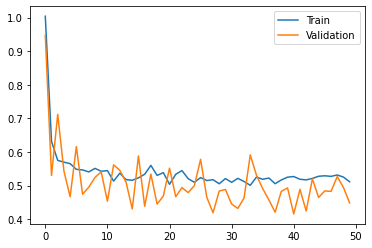

In [131]:
import matplotlib.pyplot as plt

plt.plot(fit.history['loss'], label = 'Train')
plt.plot(fit.history['val_loss'], label = 'Validation')
plt.legend()

In [132]:
mse, mae = model.evaluate(x_train, y_train, verbose=0)

In [133]:
print("Средняя абсолютная ошибка:", mae)

Средняя абсолютная ошибка: 0.7754490971565247


In [134]:
pred = model.predict(x_test)

In [135]:
print(pred[1], y_test[1])

[0.09241349] [0.]


In [136]:
resuts = {'pred': [i for i in pred], 'y': [i for i in y_test]}


In [137]:
resuts = pd.DataFrame(resuts)

In [138]:
resuts 

,pred,y
0,[0.9891379],[1.0]
1,[0.092413485],[0.0]
2,[0.033000857],[0.0]
3,[0.0056022704],[0.0]
4,[0.6161246],[1.0]
...,...,...
218,[0.7371009],[0.0]
219,[0.87175584],[0.0]
220,[0.05609259],[0.0]
221,[0.021749705],[0.0]


### we used softmax, so we got probabilities)